In [1]:
# Import Splinter and BeautifulSoup and Pandas
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"

In [4]:
browser.visit(url)

In [6]:
html = browser.htmlß
df = pd.read_html(url)

In [114]:
browser.quit()

In [27]:
df.set_index('id')

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1894,2018-02-25,1975,134,5,-76.0,729.0


In [150]:
from datetime import date as dt
pd.terrestrial_date = pd.to_datetime(df.terrestrial_date)

In [151]:
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [147]:
import matplotlib.pyplot as plt

## How many months exist on Mars?

In [148]:
df.month.nunique()

12

So there are 12 unique months on Mars

## Which month has the highest and which has the lowest avg temperature?


In [93]:
temp = df.groupby('month')[['min_temp','month']].mean().sort_values(by='min_temp',ascending=True)
temp

,min_temp,month
month,,
3,-83.307292,3.0
4,-82.747423,4.0
2,-79.932584,2.0
5,-79.308725,5.0
1,-77.160920,1.0
6,-75.299320,6.0
12,-74.451807,12.0
7,-72.281690,7.0
11,-71.985507,11.0


Text(0, 0.5, 'Average Temperature')

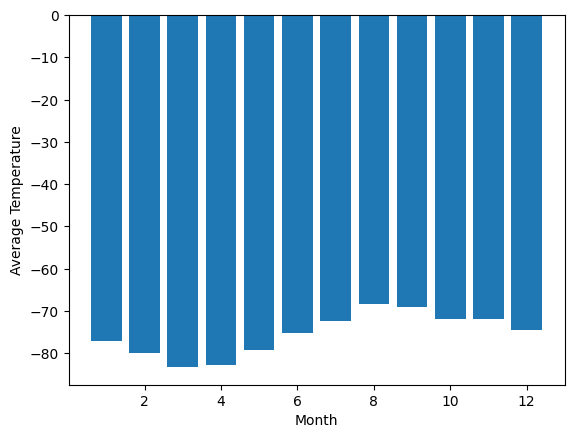

In [107]:
plt.bar(temp.month,temp.min_temp)
plt.xlabel('Month')
plt.ylabel('Average Temperature')

So month 3 has the lowest average temperature
and month 8 has the highest. 

## Which month, on average, has the lowest atmospheric pressure? The highest?

In [112]:
pressure = df.groupby('month', as_index=False)[['pressure', 'month']].\
            mean().sort_values(by='pressure',ascending=False)
pressure

,pressure,month
8,913.305970,9.0
1,889.455056,2.0
9,887.312500,10.0
2,877.322917,3.0
7,873.829787,8.0
0,862.488506,1.0
10,857.014493,11.0
11,842.156627,12.0
3,806.329897,4.0
6,795.105634,7.0


<BarContainer object of 12 artists>

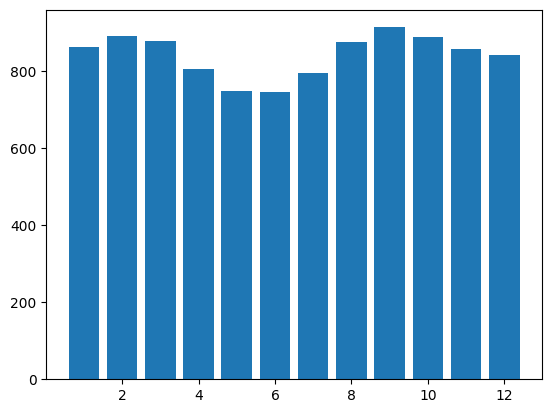

In [113]:
plt.bar(pressure.month, pressure.pressure)
plt.xlable('month')
plt.ylable('pressure')

The month with the lowest pressure is month 6 and the highest is month 9.

## How many terrestrial days exist in a Martian Year?

Text(0, 0.5, 'Minimum Temperature')

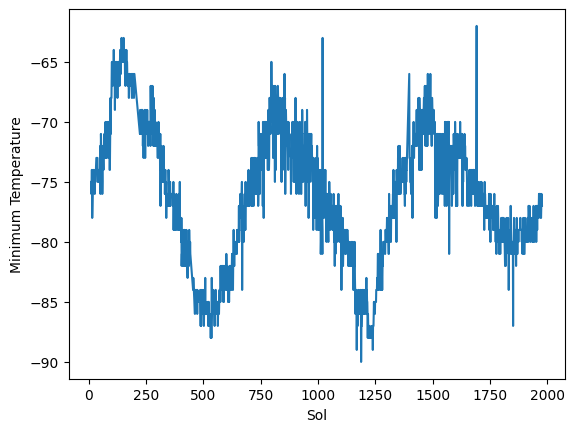

In [140]:
import numpy as np
plt.plot(df.sol, df.min_temp)
plt.xlabel('Sol')
plt.ylabel('Minimum Temperature')

With the knowledge that one martian year will be the length of one full cyle from lowest temperatures to lowest tempuatures, ie martian winter to martian winter, we can estimate the length of the year.

So, the length of the yeawr is approximately 1250-500 sol (martian days) which means that the martian year is 750 sol. 

The question is how many earth days pass per martian day. Assuming the days are approximately the same length. We arrive at the conclusion that 750 Terrestrial days exist in one martian year. Thereby making a martian year just over 2 terrestrial years. 

In [142]:
df.to_csv('mars_data.csv')